In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree

In [219]:
truth = './data/processed/truth.txt'
pred = './data/processed/predictions.txt'

df_truth = pd.read_csv(truth, header=None, names=['class'])
df_pred = pd.read_csv(pred, header=None, names=['class'])

In [220]:
df_truth, df_pred

(   class
 0   Jedi
 1   Jedi
 2   Sith
 3   Sith
 4   Jedi
 ..   ...
 95  Sith
 96  Sith
 97  Sith
 98  Jedi
 99  Sith
 
 [100 rows x 1 columns],
    class
 0   Sith
 1   Sith
 2   Jedi
 3   Sith
 4   Jedi
 ..   ...
 95  Sith
 96  Jedi
 97  Jedi
 98  Sith
 99  Jedi
 
 [100 rows x 1 columns])

In [221]:
def generate_confusion_matrix(truth, pred, true_label, negative_label):
    confusion_matrix = np.array([
        [0, 0],
        [0, 0]
    ])

    for i in range(len(truth)):
        if truth['class'][i] == true_label and pred['class'][i] == true_label: # TP
            confusion_matrix[0][0] += 1
        elif truth['class'][i] == negative_label and pred['class'][i] == negative_label: # TN
            confusion_matrix[1][1] += 1
        elif truth['class'][i] == true_label and pred['class'][i] == negative_label: # FP
            confusion_matrix[0][1] += 1
        elif truth['class'][i] == negative_label and pred['class'][i] == true_label: # FN
            confusion_matrix[1][0] += 1

    return confusion_matrix

def generate_metrics(confusion_matrix):
    TP = confusion_matrix[0][0]
    TN = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]

    precision = float(f'{TP / (TP + FP):.2f}')
    recall = float(f'{TP / (TP + FN):.2f}')
    f1_score = float(f'{2 * (precision * recall) / (precision + recall):.2f}')
    accuracy = float(f'{(TP + TN) / (TP + TN + FP + FN):.2f}')

    return precision, recall, f1_score, accuracy



In [222]:
j_confusion_matrix = generate_confusion_matrix(df_pred, df_truth, 'Jedi', 'Sith')
s_confusion_matrix = generate_confusion_matrix(df_pred, df_truth, 'Sith', 'Jedi')

j_precision, j_recall, j_f1_score, j_accuracy = generate_metrics(j_confusion_matrix)
s_precision, s_recall, s_f1_score, s_accuracy = generate_metrics(s_confusion_matrix)

j_total = len(df_truth[df_truth['class'] == 'Jedi'])
s_total = len(df_truth[df_truth['class'] == 'Sith'])

In [223]:
df_metrics = pd.DataFrame({
    'precision': [j_precision, s_precision],
    'recall': [j_recall, s_recall],
    'f1_score': [j_f1_score, s_f1_score],
    'total': [j_total, s_total],
}, index=['Jedi', 'Sith'])

df_metrics.loc['Accuracy'] = ['', '', j_accuracy, j_total + s_total]
print(df_metrics)

confusion_matrix = generate_confusion_matrix(df_truth, df_pred, 'Jedi', 'Sith')
print(confusion_matrix)

# [[25 24]
# [30 21]]

         precision recall  f1_score  total
Jedi          0.45   0.51      0.48     49
Sith          0.47   0.41      0.44     51
Accuracy                       0.46    100
[[25 24]
 [30 21]]


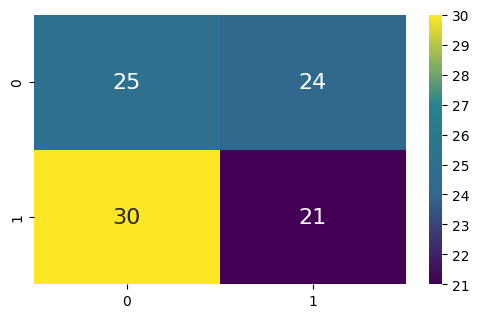

In [224]:
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom", ['#440054', '#31688E', '#27828E', '#FDE724'])

plt.figure(figsize=(6, 3.5))
sns.heatmap(confusion_matrix, annot=True, annot_kws={
  'size': 16
}, cmap=custom_cmap)
plt.show()

### Ex01

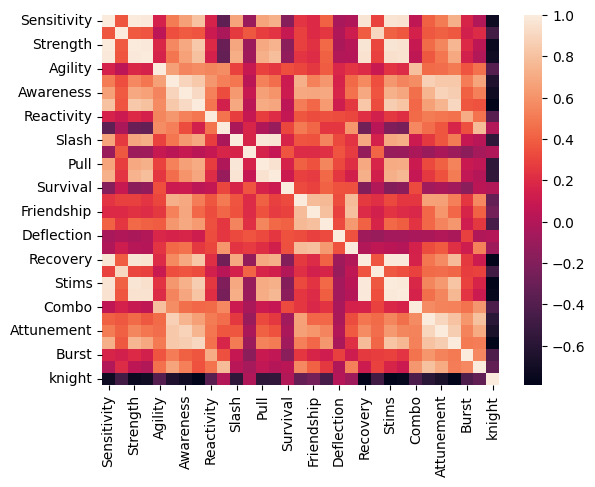

In [225]:
train_knight = pd.read_csv('./knights/Training_knight.csv')
train_knight_copy = train_knight.copy()
train_knight_copy['knight'] = train_knight_copy['knight'].astype('category').cat.codes
correlation_matrix = train_knight_copy.corr()

sns.heatmap(correlation_matrix)
plt.show()

### Ex02

Variances (Percentage):
 [4.50897004e+01 1.76525489e+01 9.77964116e+00 6.39562972e+00
 5.23227748e+00 3.93761669e+00 2.35683143e+00 1.76215225e+00
 1.29420540e+00 1.17299234e+00 1.02564250e+00 8.90258609e-01
 7.67528183e-01 6.62482905e-01 3.96911336e-01 3.09136215e-01
 2.63377774e-01 2.18056777e-01 1.74412161e-01 1.36947557e-01
 1.10033698e-01 9.53585708e-02 6.93262699e-02 6.30476397e-02
 5.00486060e-02 4.45308183e-02 2.26184271e-02 1.91315132e-02
 5.16539601e-03 2.04210792e-03 3.47206741e-04]

Cumulative Variances (Percentage):
[ 45.08970038  62.74224925  72.52189042  78.91752014  84.14979761
  88.0874143   90.44424574  92.20639799  93.50060339  94.67359573
  95.69923823  96.58949684  97.35702502  98.01950793  98.41641926
  98.72555548  98.98893325  99.20699003  99.38140219  99.51834975
  99.62838344  99.72374202  99.79306828  99.85611592  99.90616453
  99.95069535  99.97331378  99.99244529  99.99761069  99.99965279
 100.        ]


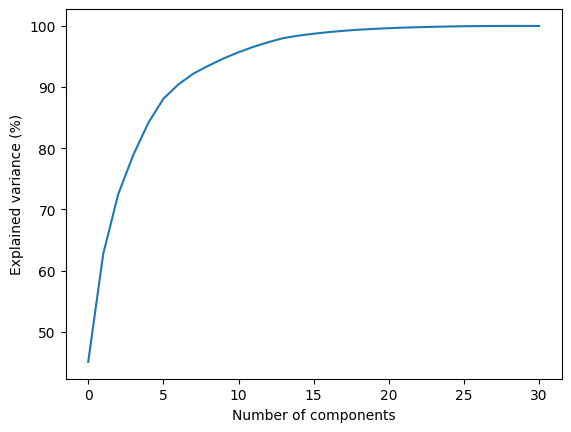

In [226]:
train_knight_scaled = (train_knight_copy - train_knight_copy.mean()) / train_knight_copy.std()

pca = PCA()
pca.fit_transform(train_knight_scaled)

variances = pca.explained_variance_ratio_
cumulative_variances = np.cumsum(variances)

np.set_printoptions(suppress=False)
print(f"Variances (Percentage):\n {variances * 100}\n")
print(f"Cumulative Variances (Percentage):\n{cumulative_variances * 100}")

plt.plot(cumulative_variances * 100)
plt.xlabel('Number of components')
plt.ylabel('Explained variance (%)')
plt.show()

### Ex03

In [227]:
vif_data = pd.DataFrame()
vif_data["VIF"] = [variance_inflation_factor(train_knight_scaled.values, i)
                          for i in range(len(train_knight_scaled.columns))]
vif_data["Tolerance"] = [1 / vif_data['VIF'][i] for i in range(len(vif_data['VIF']))]
vif_data.set_index(train_knight_scaled.columns, inplace=True)

vif_data

# print(vif_data[vif_data['VIF'] < 5])

,VIF,Tolerance
Sensitivity,4661.902555,0.000215
Hability,11.729943,0.085252
Strength,4777.231270,0.000209
Power,412.349326,0.002425
Agility,8.374399,0.119412
Dexterity,57.862252,0.017282
Awareness,78.271435,0.012776
Prescience,55.182255,0.018122
Reactivity,4.077213,0.245266
Midi-chlorien,16.501572,0.060600


### Ex04 (Decision Tree Implementation from Scratch)

In [228]:
class Node:
  def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value
  

  def is_leaf_node(self):
    return self.value is not None

class DecisionTree:
  def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    self.n_feats = n_feats
    self.root = None

  def fit(self, X, y):
    self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
    self.root = self._grow_tree(X, y)

  def _grow_tree(self, X, y, depth=0):
    n_samples, n_feats = X.shape
    n_labels = len(np.unique(y))

    # Check the stopping criteria
    if depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split:
      leaf_value = self._most_common_label(y)
      return Node(value=leaf_value)

    # Find the best split
    feature_indices = np.random.choice(n_feats, self.n_feats, replace=False)
    best_feature, best_threshold = self._best_split(X, y, feature_indices)

    # Create the sub trees
    left_indices, right_indices = self._split(X[:, best_feature], best_threshold)
    left = self._grow_tree(X[left_indices, :], y[left_indices], depth+1)
    right = self._grow_tree(X[right_indices, :], y[right_indices], depth+1)
    return Node(best_feature, best_threshold, left, right)


  def _best_split(self, X, y, feature_indices):
    best_gain = -1
    split_index, split_threshold = None, None

    for i in feature_indices:
      X_column = X[:, i]
      thresholds = np.unique(X_column)

      for threshold in thresholds:
        gain = self._information_gain(X_column, y, threshold)
        if gain > best_gain:
          best_gain = gain
          split_index = i
          split_threshold = threshold

    return split_index, split_threshold

  def _information_gain(self, X_column, y, threshold):
    """
      Calculate the information gain of a split\n
      IG = E(Parent) - [Weighted Average] * E(Children)
    """
    parent_entropy = self._entropy(y)

    left_indices, right_indices = self._split(X_column, threshold)
    if (len(left_indices) == 0 or len(right_indices) == 0):
      return 0

    n = len(y)
    n_samples_left, n_samples_right = len(left_indices), len(right_indices)
    entropy_left, entropy_right = self._entropy(y[left_indices]), self._entropy(y[right_indices])
    child_entropy = (n_samples_left / n) * entropy_left + (n_samples_right / n) * entropy_right

    information_gain = parent_entropy - child_entropy
    return information_gain


  def _split(self, X_column, threshold):
    left_indices = np.argwhere(X_column <= threshold).flatten()
    right_indices = np.argwhere(X_column > threshold).flatten()
    return left_indices, right_indices
  
  def _entropy(self, y):
    """
      Calculate the entropy of a label array\n
      E = Entropy = -sum(p(X)) * log(p(X))\n
      p(X) = #(x) / n
    """
    counter = Counter(y)
    entropy = 0

    for x in counter:
      p_x = counter[x] / len(y)
      entropy += -p_x * np.log2(p_x)

    return entropy

  def _most_common_label(self, y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common


  def predict(self, X):
    return np.array([self._traverse_tree(x, self.root) for x in X])

  def _traverse_tree(self, x, node):
    if node.is_leaf_node():
      return node.value

    if x[node.feature] <= node.threshold:
      return self._traverse_tree(x, node.left)
    return self._traverse_tree(x, node.right)

In [229]:
# Knight Dataset
train_data = pd.read_csv('./knights/Training_knight.csv')
validation_data = pd.read_csv('./knights/Validation_knight.csv')

X_train = train_data.values
y_train = train_data['knight'].values

X_validation = validation_data.values
y_validation = validation_data['knight'].values

decision_tree = DecisionTree(max_depth=5)
decision_tree.fit(X_train, y_train)
predictions = decision_tree.predict(X_validation)

print(classification_report(y_validation, predictions))

              precision    recall  f1-score   support

        Jedi       1.00      1.00      1.00        43
        Sith       1.00      1.00      1.00        77

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [230]:
# Iris Dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

decision_tree = DecisionTree()
decision_tree.fit(X_train, y_train)
predictions = decision_tree.predict(X_test)

clr = tree.DecisionTreeClassifier()
clr.fit(X_train, y_train)
sk_predictions = clr.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.94      0.94      0.94        17
           2       0.92      1.00      0.96        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### Ex04 (Sklearn)

              precision    recall  f1-score   support

        Jedi       0.95      0.93      0.94        43
        Sith       0.95      0.96      0.96        57

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



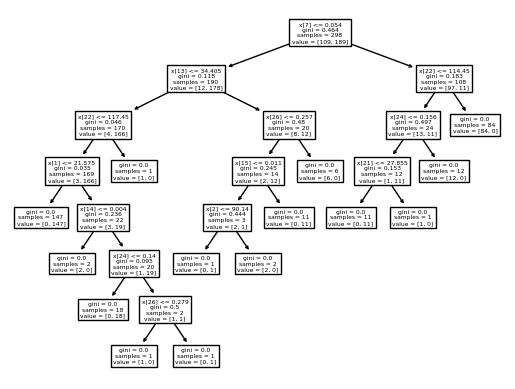

In [241]:
train_data = pd.read_csv('./knights/Train_knight.csv')

X = train_data.drop(['knight'], axis=1).values
y = train_data['knight'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(classification_report(y_test, predictions))

tree.plot_tree(clf)
plt.show()

In [232]:
test_data = pd.read_csv('./knights/Test_knight.csv')
X_test = test_data.values
predictions = clf.predict(X_test)
np.savetxt('./data/processed/tree.txt', predictions, fmt='%s')